In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm


input_folder ='./'
dataset = dataset =  pd.read_pickle(os.path.join(input_folder,'dataset.pl'))

In [5]:
type(dataset.ids.to_numpy()[0])

numpy.int64

In [123]:
!pip install dtaidistance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 7.6 kB/s eta 0:00:00m eta 0:00:010:00:10m

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [131]:
!pip install tslearn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [132]:
from dtaidistance import dtw
from tslearn.metrics import dtw as ts_dtw

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f01e03f7ee0>
Traceback (most recent call last):
  File "/home/yannick/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/yannick/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/yannick/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/yannick/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [56]:
pd.unique(dataset['ids'])

array([   1,    2,    3, ..., 2997, 2998, 2999])

In [72]:
def distance(node_1, node_2):
    """
       input :
         node_1: matrix numpy (mfcc)
         node_2: matrix numpy (mfcc)
       purpose : compute distance between 2 nodes
       output : scalar
                distance
    """
    return np.linalg.norm(node_1-node_2)

In [133]:
def matrix_distance(dataset):
    
    distances = []
    ids = pd.unique(dataset['ids'])
    df = []
    count =5
    for id1 in tqdm(ids):
        count=count-1
        dis = []
        for id2 in ids:
            d = ts_dtw(dataset[dataset['ids']==id1]['mfcc_feautres'].values[0], 
                         dataset[dataset['ids']==id2]['mfcc_feautres'].values[0])
            dis.append(d)
            label1 = dataset[dataset['ids']==id1]['label'].values[0]
            label2 = dataset[dataset['ids']==id2]['label'].values[0]
            df.append([id1, id2,label1, label2, d])
        distances.append(dis)
        if count == 0:
            break

    return  distances ,pd.DataFrame(df, columns = ['id_node_1','id_node_2', 'label1','label2','distance'])

In [134]:
matrix_disances, df = matrix_distance(dataset)

In [135]:
np.array(matrix_disances).shape

(5, 2999)

In [139]:
df.head(10)

,id_node_1,id_node_2,label1,label2,distance
0,1,1,6,6,0.000000
1,1,2,6,7,1409.233483
2,1,3,6,5,1813.989133
3,1,4,6,5,2469.204911
4,1,5,6,0,1341.319319
5,1,6,6,7,1294.532460
6,1,7,6,3,1313.688429
7,1,8,6,9,1433.976888
8,1,9,6,0,1850.330150
9,1,10,6,6,2303.288137


<AxesSubplot:>

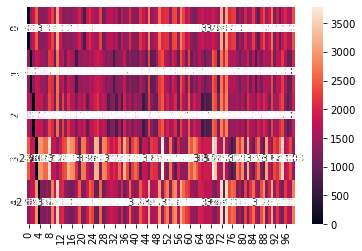

In [136]:
sns.heatmap(np.array(matrix_disances)[:,:100], annot = True)

<AxesSubplot:>

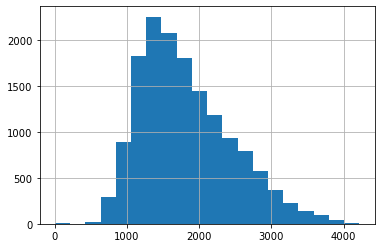

In [137]:
df["distance"].hist(bins=20)

<AxesSubplot:>

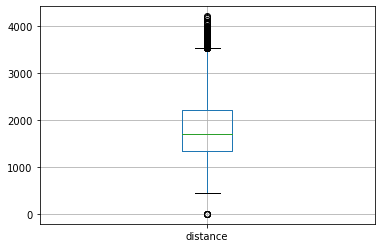

In [138]:
df.boxplot(column=['distance'])

In [71]:
df.head(3)


,id_node_1,id_node_2,label1,label2,distance


In [86]:
np.array([[1,2], [2,3]]).shape

(2, 2)

<AxesSubplot:>

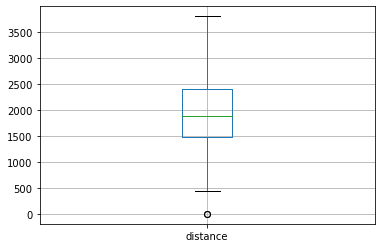

In [110]:
df[df['label1']=='6'].boxplot(column =["distance"])

<AxesSubplot:>

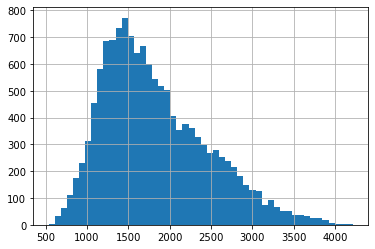

In [141]:
df[(df['label1']!=df['label2'])&(df['id_node_1']!=df['id_node_2'])]["distance"].hist(bins=50)

<AxesSubplot:>

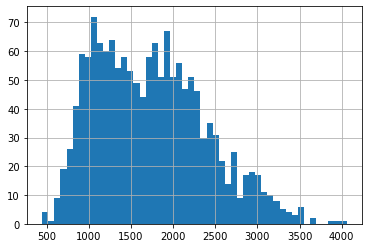

In [142]:
df[(df['label1']==df['label2'])&(df['id_node_1']!=df['id_node_2'])]["distance"].hist(bins=50)